In [1]:
#template 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("C:\\Train\\Python\\DataTalk\\02-regression\\HW\\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.price.min()
#10000

0

<AxesSubplot:xlabel='price', ylabel='Count'>

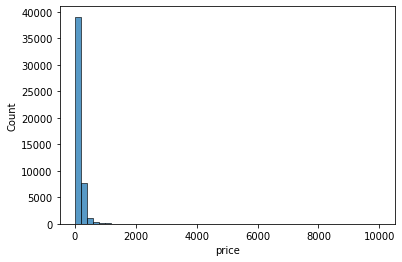

In [4]:
sns.histplot(df.price , bins= 50) #without the bins

<AxesSubplot:xlabel='price', ylabel='Count'>

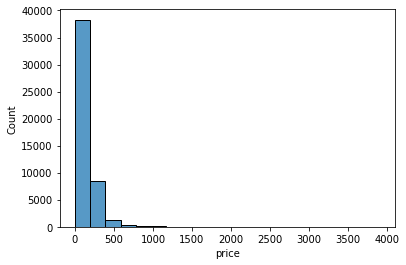

In [5]:
#yes it is lobg tail
sns.histplot(df.price[df.price <4000],bins = 20) # to make the graph more closer to the truth to mmit the sizes use a filter on msrp

In [6]:
price_logs = np.log1p(df.price)
price_logs

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

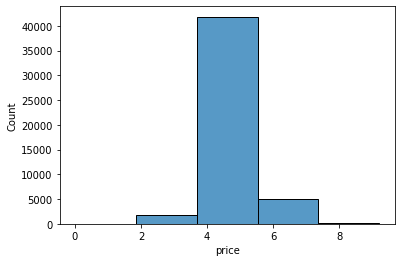

In [7]:
sns.histplot(price_logs, bins = 5)

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
len(df)


48895

In [10]:
col = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',
'availability_365']
df_full = df[col]
df_full  # this will have he full df with only the columnd that are needed

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [11]:
# nee to figure out to release the index
df_full.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [12]:
df_full.isnull().sum() # Q1

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
df_full.minimum_nights.median()

3.0

In [14]:
def train_linear_regression_reg(X,y,r):  
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX =X.T.dot(X)
    XTX  = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [15]:
def rmse(y_train , pred ):
    se  = (y_train - pred)**2
    mse = se.mean()
    return np.sqrt(mse)
    

In [16]:
def train_linear_regression(X,y):  
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX =X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]  
    


In [17]:
def prepare_X(xf):
    xf = xf.copy()
    xf_num = xf.fillna(0) 
    X = xf_num.values    
    return X 

In [53]:
# since we are going to keep repeating this might as well pur in one cell
n = len(df)
idx = np.arange(n)
np.random.seed(9) # this so the indexes will alsways be uniqure otherwise it will change with every run 
np.random.shuffle(idx)
n_val = int( n *.2) # 20% data set validation set
n_test = int( n *.2) # 20% data set test  set
n_train  = n - n_val - n_test #this will correct the error
df_train = df_full.iloc[idx[:n_train]]
df_val = df_full.iloc[idx [n_train:n_train  + n_val]]
df_test = df_full.iloc[idx[n_train  + n_val:]]
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
y_train = np.log1p(df_train.price)
y_val = np.log1p(df_val.price)
y_test = np.log1p(df_test.price)
del df_train['price']
del df_val['price']
del df_test['price']
#Q3 fill the missing reviews_per_month data by zero
# stooooooooooooooooooooooooooooooooooooooooop
df_train = df_train.fillna(0)
#df_train = df_train.fillna(df.mean())

X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train , y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


0.6437565168179556

In [42]:
X_train = prepare_X(df_train)
w0 , w = train_linear_regression(X_train , y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.6489780353275592

In [44]:
# question 6 
df_full_train = pd.concat([df_train ,df_val]) # add the train and val remember concat

df_full_train = df_full_train.reset_index(drop = True) # remove the index from val 
X_full_train = prepare_X(df_full_train)



In [45]:
len(df_full_train)

39116

In [46]:

# we also need y for the two df's
Y_full_train = np.concatenate([y_train,y_val]) # numpy concat tsk tsk 

In [50]:
len(Y_full_train)

39116

In [51]:
r = .001
w0 , w = train_linear_regression_reg(X_full_train , Y_full_train,r)


In [52]:
rmse(y_val, y_pred)

0.6437565168179556